In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [12]:
def build_coeff_mat(xdata,ind_a, ind_b):
    coeff_mat = np.zeros((10,8))
    for i, z, a, b in zip(range(10), xdata, ind_a, ind_b):
        # set a
        coeff_mat[i][a[0]] += 1
        coeff_mat[i][a[1]] += 1
        # set b
        coeff_mat[i][b[0]] += z[1]
        coeff_mat[i][b[1]] += z[0]
    return(coeff_mat)

In [42]:
energies_2 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_2/energies_single.txt')
ebfe_exp_2 = energies_2[:,1]*2600
nbfe_2 = energies_2[:,2]*2600
ref_bde_2 = -energies_2[:,0]*2600

energies_3 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_3/energies_single.txt')

# energies_3_BSSE = np.array([[ -0.12243122, -48.94854773,  48.8261165 ],
#        [ -0.11710693, -52.43080318,  52.31369626],
#        [ -0.14316183, -55.94443784,  55.80127601],
#        [ -0.17546897, -59.46432472,  59.28885576],
#        [ -0.09901554, -56.14940439,  56.05038884],
#        [ -0.11227546, -59.8993569 ,  59.78708143],
#        [ -0.13098146, -63.65475549,  63.52377402],
#        [ -0.11077551, -63.88366237,  63.77288686],
#        [ -0.10975937, -67.86845166,  67.75869229],
#        [ -0.09878434, -72.0923949 ,  71.99361056]])

# energies_3 = energies_3_BSSE
ebfe_exp_3 = energies_3[:,1]*2600
nbfe_3 = energies_3[:,2]*2600
ref_bde_3 = -energies_3[:,0]*2600
# nbfe_3 = energies_3[:,2]*2600
# ref_bde_3 = np.array([313.2, 287.3, 357.4, 448.4, 225.8, 263.7, 315.1, 252, 258.3, 234.6])
# ebfe_exp_3 = -ref_bde_3.copy() - nbfe_3


energies_4 = np.loadtxt('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/row_4/energies_single.txt')
ebfe_exp_4 = energies_4[:,1]*2600
nbfe_4 = energies_4[:,2]*2600
ref_bde_4 = -energies_4[:,0]*2600



In [43]:
nuc_charges_2 = [6, 7, 8, 9]
xdata_2 = []
for i in range(len(nuc_charges_2)):
    for j in range(i, len(nuc_charges_2)):
        xdata_2.append([nuc_charges_2[i], nuc_charges_2[j]])
xdata_2 = np.array(xdata_2)

nuc_charges_3 = [14, 15, 16, 17]
xdata_3 = []
for i in range(len(nuc_charges_3)):
    for j in range(i, len(nuc_charges_3)):
        xdata_3.append([nuc_charges_3[i], nuc_charges_3[j]])
xdata_3 = np.array(xdata_3)

nuc_charges_4 = [32, 33, 34, 35]
xdata_4 = []
for i in range(len(nuc_charges_4)):
    for j in range(i, len(nuc_charges_4)):
        xdata_4.append([nuc_charges_4[i], nuc_charges_4[j]])
xdata_4 = np.array(xdata_4)

# indices for coeff mat

ind_a = []
for i in range(4):
    for j in range(i, 4):
        ind_a.append([i, j])
        
ind_b = []
for i in range(4, 8):
    for j in range(i, 8):
        ind_b.append([i, j])
        
coeff_mat_2 = build_coeff_mat(xdata_2, ind_a, ind_b)
coeff_mat_3 = build_coeff_mat(xdata_3, ind_a, ind_b)
coeff_mat_4 = build_coeff_mat(xdata_4, ind_a, ind_b)


data_2 = {'ebfe':ebfe_exp_2, 'nbfe':nbfe_2, 'ref_bde':ref_bde_2, 'coeff_mat':coeff_mat_2}
data_3 = {'ebfe':ebfe_exp_3, 'nbfe':nbfe_3, 'ref_bde':ref_bde_3, 'coeff_mat':coeff_mat_3}
data_4 = {'ebfe':ebfe_exp_4, 'nbfe':nbfe_4, 'ref_bde':ref_bde_4, 'coeff_mat':coeff_mat_4}

data_collection = [data_2, data_3, data_4]

In [44]:
def fit(coeff_mat, ebfe_exp, nbfe, ref_bde):

    coeffs, mae, rank, sg = np.linalg.lstsq(coeff_mat, ebfe_exp, rcond=None)

    # mae = np.abs(coeffs@coeff_mat.T-ebfe_exp).mean()

    # var_ue = ((coeffs@coeff_mat.T-ebfe_exp)**2).sum()
    # var_tot = ((ebfe_exp - ebfe_exp.mean())**2).sum()
    # r2 = 1 - var_ue/var_tot

    # print(f'MAE of EBFE in kJ/mol {mae}')
    # print(f'r2 of EBFE in (Ha) = {r2}')

    ebfe_el = coeffs@coeff_mat.T
    predicted_bde = -(ebfe_el + nbfe)

    mae_final = np.abs(predicted_bde-ref_bde).mean()
    # r2_final = 1 - ((predicted_bde-ref_bde)**2).sum()/((ref_bde-ref_bde.mean())**2).sum()

    print(f'MAE of BDE in in kJ/mol {mae_final}')
#     print(f'r2 of BDE in (Ha) = {r2_final}')
    
    return(predicted_bde, mae_final, coeffs)

In [45]:
for d in data_collection:
    predicted_bde, mae, coeffs = fit(d['coeff_mat'], d['ebfe'], d['nbfe'], d['ref_bde'])
    d['predicted_bde'] = predicted_bde
    d['mae'] = mae
    d['coeffs'] = coeffs

MAE of BDE in in kJ/mol 2.1191100720359715
MAE of BDE in in kJ/mol 1.6066656500216596
MAE of BDE in in kJ/mol 1.3515720686598798


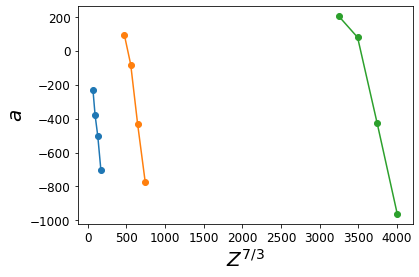

In [62]:
plt.rcParams['figure.figsize'] = [6,4]
for d, z in zip(data_collection, np.array([[6,7,8,9],[14, 15, 16, 17],[32, 33, 34, 35]])):
    plt.plot(z**(7/3), d['coeffs'][:4], '-o')

plt.xlabel('$Z^{7/3}$', fontsize = 20)
plt.ylabel('$a$', fontsize = 20)

plt.savefig('/home/sahre/work/bonding_trends/figures/a_vs_Z.png', bbox_inches = 'tight')

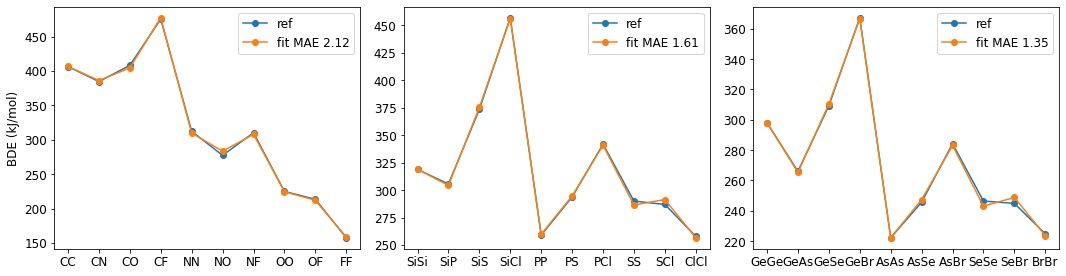

In [31]:
frag_types_2 = ['C', 'N', 'O', 'F']
comps_2 = []
for i in range(len(frag_types_2)):
    for j in range(i, len(frag_types_2)):
        comps_2.append(frag_types_2[i]+ frag_types_2[j])

frag_types_3 = ['Si', 'P', 'S', 'Cl']
comps_3 = []
for i in range(len(frag_types_3)):
    for j in range(i, len(frag_types_3)):
        comps_3.append(frag_types_3[i]+ frag_types_3[j])

frag_types_4 = ['Ge', 'As', 'Se', 'Br']
comps_4 = []
for i in range(len(frag_types_4)):
    for j in range(i, len(frag_types_4)):
        comps_4.append(frag_types_4[i]+ frag_types_4[j])

plt.rcParams['font.size'] = 12
plt.rcParams["figure.figsize"] = [15,4]

fig, ax = plt.subplots(1,3)

ax[0].plot(comps_2, data_2['ref_bde'], '-o', label = 'ref')
# ax[0].plot(comps_2, fit_2, '-o', label = f'fit MAE {np.round(mae_2,2)}\n$r^2$ = {np.round(r2_2,8)}')
mae = data_2['mae']
ax[0].plot(comps_2, data_2['predicted_bde'], '-o', label = f'fit MAE {np.round(mae,2)}')
ax[0].legend()


ax[1].plot(comps_3, data_3['ref_bde'], '-o', label = 'ref')
mae = data_3['mae']

ax[1].plot(comps_3, data_3['predicted_bde'], '-o', label = f'fit MAE {np.round(mae,2)}')
# ax[1].plot(comps_3, fit_3, '-o', label = f'fit MAE {np.round(mae_3,2)}\n$r^2$ = {np.round(r2_3,8)}')
ax[1].legend()

ax[2].plot(comps_4, data_4['ref_bde'], '-o', label = 'ref')
mae = data_4['mae']

ax[2].plot(comps_4, data_4['predicted_bde'], '-o', label = f'fit MAE {np.round(mae,2)}')
# ax[2].plot(comps_4, fit_4, '-o', label = f'fit MAE {np.round(mae_4,2)}\n$r^2$ = {np.round(r2_4,8)}')
ax[2].legend()

ax[0].set_ylabel('BDE (kJ/mol)')
plt.tight_layout()

In [8]:
data_collection

[{'ebfe': array([-35259.2125287 , -41046.17353416, -46878.52784957, -52754.57389444,
         -47750.68051445, -54492.72163698, -61302.39931839, -62185.21274411,
         -69918.90834013, -78576.02440493]),
  'nbfe': array([34852.72403735, 40661.51137691, 46470.29871647, 52279.08605602,
         47438.42993973, 54215.34850254, 60992.26706536, 61960.39828862,
         69705.4480747 , 78418.62908404]),
  'ref_bde': array([406.48849135, 384.66215725, 408.2291331 , 475.48783841,
         312.25057473, 277.37313444, 310.13225302, 224.81445548,
         213.46026544, 157.39532089]),
  'coeff_mat': array([[ 2.,  0.,  0.,  0., 12.,  0.,  0.,  0.],
         [ 1.,  1.,  0.,  0.,  7.,  6.,  0.,  0.],
         [ 1.,  0.,  1.,  0.,  8.,  0.,  6.,  0.],
         [ 1.,  0.,  0.,  1.,  9.,  0.,  0.,  6.],
         [ 0.,  2.,  0.,  0.,  0., 14.,  0.,  0.],
         [ 0.,  1.,  1.,  0.,  0.,  8.,  7.,  0.],
         [ 0.,  1.,  0.,  1.,  0.,  9.,  0.,  7.],
         [ 0.,  0.,  2.,  0.,  0.,  0., 16.,  

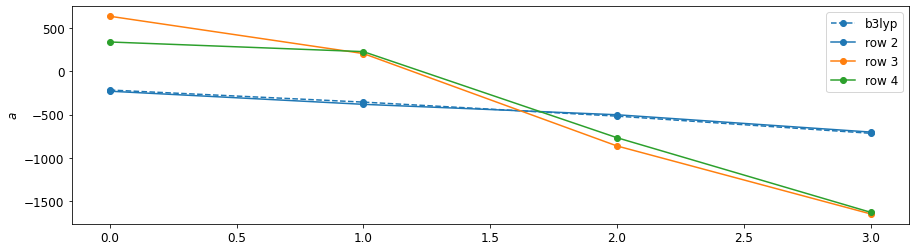

In [18]:
coeffs_exp = np.array([ -214.77011942,  -354.87348733,  -517.56269922,  -716.37119726,
       -2898.5471655 , -3356.43467261, -3820.15907104, -4285.43658782])
plt.plot(coeffs_exp[:4], '--o', color='tab:blue', label = 'b3lyp')
plt.plot(data_2['coeffs'][:4], '-o', label = 'row 2')
plt.plot(data_3['coeffs'][:4], '-o', label = 'row 3')
plt.plot(data_4['coeffs'][:4], '-o', label = 'row 4')
plt.ylabel(r'$a$')
plt.legend()

In [19]:
slope_b = []
intercept = []
z_2 = [6, 7, 8, 9]
z_3 =  [14, 15,16, 17]
z_4 = [32, 33, 34, 35]
for d, z in zip(data_collection, [z_2, z_3, z_4]):
    lin_fit_b = linregress(z, d['coeffs'][4:])
    slope_b.append(lin_fit_b[0])
    intercept.append(lin_fit_b[1])
    print(lin_fit_b)
    d['slope'] = lin_fit_b[0]
    d['intercept'] = lin_fit_b[1]
    d['z'] = np.array(z)
#     out_3 = linregress([14, 15, 16, 17], data_3['coeffs'][4:])
#     out_4 = linregress([32, 33, 34, 35], data_4['coeffs'][4:])
# slope_b = np.array(slope_b)/slope_b[0]
# slope_b

LinregressResult(slope=-462.9202464265669, intercept=-120.00040658294165, rvalue=-0.9999875931268605, pvalue=1.2406873139525494e-05, stderr=1.6305772835388117, intercept_stderr=12.364464442974738)
LinregressResult(slope=-444.0542812115914, intercept=-566.2691763261673, rvalue=-0.9999298544483937, pvalue=7.014555160633763e-05, stderr=3.7192808817690013, intercept_stderr=57.79863010499829)
LinregressResult(slope=-462.42619815594736, intercept=-680.9683721757283, rvalue=-0.9999622218084799, pvalue=3.777819152006591e-05, stderr=2.8423353598225263, intercept_stderr=95.27124844077088)


Text(0, 0.5, '$b$')

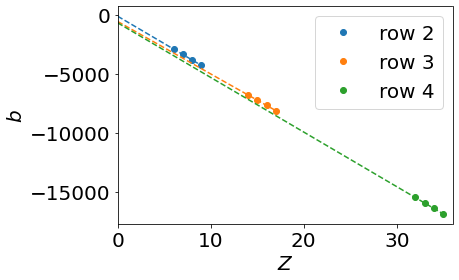

In [20]:
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [6,4]

z_collection = {'z_2':np.array([6, 7, 8, 9]), 'z_3':np.array([14, 15, 16, 17]), 'z_4':np.array([32, 33, 34, 35])}

for d, l, c in zip(data_collection, ['row 2', 'row 3', 'row 4'], ['tab:blue', 'tab:orange', 'tab:green']):
    plt.plot(d['z'], d['coeffs'][4:], 'o', label = l, color = c)
    zf = np.linspace(0, np.amax(d['z']), 10)
    plt.plot(zf, zf*d['slope']+d['intercept'], '--', color = c)
#     plt.plot(z_collection[z], d['coeffs'][4:], '-o')

    
# plt.plot([6, 7, 8, 9], data_2['coeffs'][4:], '-o', label = 'row 2')
# plt.plot([14, 15, 16, 17], data_3['coeffs'][4:], '-o', label = 'row 3')
# plt.plot([32, 33, 34, 35], data_4['coeffs'][4:], '-o', label = 'row 4')
plt.xlim((0, 36))
plt.legend()
plt.xlabel(r'$Z$')
plt.ylabel(r'$b$')

In [21]:
data_collection[0]['z']

array([6, 7, 8, 9])

Text(0, 0.5, 'a prime')

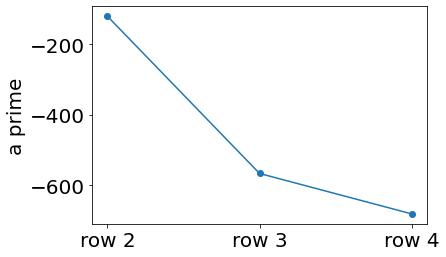

In [22]:
plt.plot(['row 2', 'row 3', 'row 4'], intercept, '-o')
plt.ylabel('a prime')

In [23]:
mean_dist = np.array([1.4209260451113328, 2.1242470361150314, 2.3617545069795707])

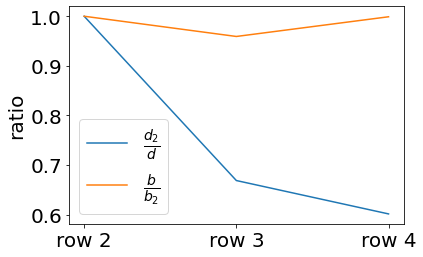

In [24]:
plt.plot(['row 2', 'row 3', 'row 4'], mean_dist[0]/mean_dist, label = r'$\frac{d_2}{d}$')
plt.plot(slope_b/slope_b[0], label = r'$\frac{b}{b_2}$')
plt.ylabel('ratio')
plt.legend()

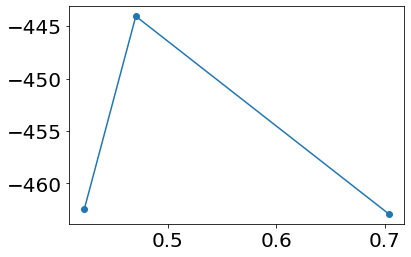

In [25]:
plt.plot(1/mean_dist, slope_b, '-o')

In [26]:
slope_b

[-462.9202464265669, -444.0542812115914, -462.42619815594736]

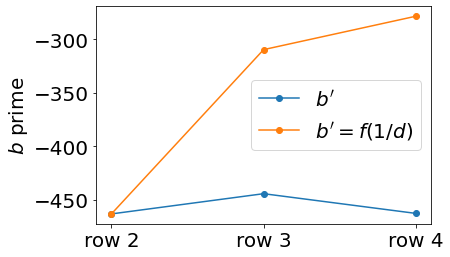

In [27]:
plt.plot(['row 2', 'row 3', 'row 4'], slope_b, '-o', label = '$b\'$')
plt.plot(slope_b[0]*mean_dist[0]/mean_dist, '-o', label = '$b\' = f(1/d)$')
plt.ylabel(r'$b$ prime')
plt.legend()

In [28]:
e_free = lambda Z: -0.7687745*np.power(Z, 7/3) + 0.5*np.power(Z, 2) - 0.2699*np.power(Z, 5/3)
e_free_1 = lambda Z: -0.7687745*np.power(Z, 7/3)

# e_free_2 = lambda Z: -(0.7687*np.power(Z, 7/3)*(1-0.6504*np.power(Z, -1/3)+0.346*np.power(Z, -2/3)))

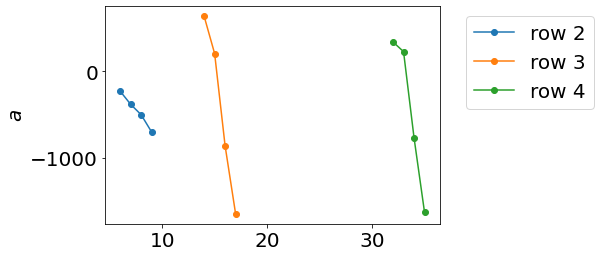

In [29]:
coeffs_exp = np.array([ -214.77011942,  -354.87348733,  -517.56269922,  -716.37119726,
       -2898.5471655 , -3356.43467261, -3820.15907104, -4285.43658782])
# plt.plot(z_2, coeffs_exp[:4], '--o', color='tab:blue', label = 'b3lyp')
plt.plot(z_2, data_2['coeffs'][:4], '-o', label = 'row 2')
plt.plot(z_3, data_3['coeffs'][:4], '-o', label = 'row 3')
plt.plot(z_4, data_4['coeffs'][:4], '-o', label = 'row 4')
plt.ylabel(r'$a$')
plt.legend(bbox_to_anchor = (1.05, 1))

Text(0, 0.5, '$a$')

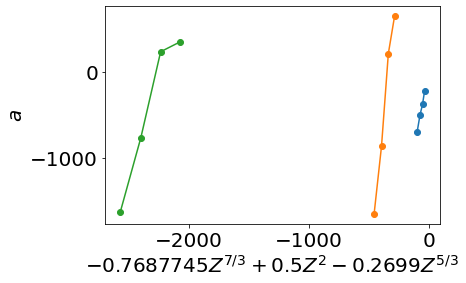

In [30]:
# plt.plot(e_free(data_collection[0]['z']), coeffs_exp[:4], '--o', color = 'tab:blue')
# plt.plot(e_free(data_collection[0]['z']), data_2['coeffs'][:4], '-o', color = 'tab:blue')

plt.plot(e_free(data_collection[0]['z']), data_collection[0]['coeffs'][:4], '-o')

plt.plot(e_free(data_collection[1]['z']), data_collection[1]['coeffs'][:4], '-o')

plt.plot(e_free(data_collection[2]['z']), data_collection[2]['coeffs'][:4], '-o')

plt.xlabel('$-0.7687745 Z^{7/3} + 0.5 Z^2 - 0.2699 Z^{5/3}$')
plt.ylabel('$a$')

In [31]:
linregress(e_free(data_collection[0]['z']), data_collection[0]['coeffs'][:4])

LinregressResult(slope=7.467084127391615, intercept=44.623456289986564, rvalue=0.9974156185373392, pvalue=0.002584381462660823, stderr=0.38034035829517915, intercept_stderr=26.84220165989168)

In [32]:
linregress(e_free(data_collection[1]['z']), data_collection[1]['coeffs'][:4])

LinregressResult(slope=14.05294596113429, intercept=4777.013466263632, rvalue=0.9916124526249552, pvalue=0.008387547375044765, stderr=1.2951805563971837, intercept_stderr=485.65179054606926)

In [33]:
linregress(e_free(data_collection[2]['z']), data_collection[2]['coeffs'][:4])

LinregressResult(slope=4.213314704388844, intercept=9310.864893689497, rvalue=0.9660166767387007, pvalue=0.03398332326129928, stderr=0.7971697299475881, intercept_stderr=1853.9298401351766)

In [34]:
f = (1+x)*np.exp(-x)
plt.plot(x, f)

NameError: name 'x' is not defined

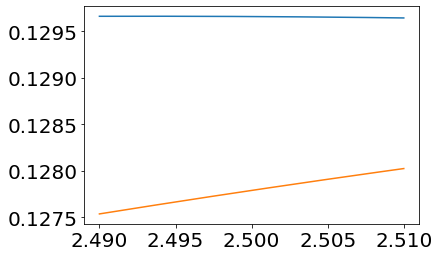

In [92]:
x = np.linspace(2.49, 2.51, 1000)

f = lambda x: -(2/x*((1+x)*np.exp(-2*x)+(1-2*x**2/3)*np.exp(-x))/(1+(1+x+x**2/3)*np.exp(-x)))
f2 = lambda x: -(2/(x-0.17)*((1+(x-0.17))*np.exp(-2*(x-0.17))+(1-2*(x-0.17)**2/3)*np.exp(-(x-0.17)))/(1+(1+(x-0.17)+(x-0.17)**2/3)*np.exp(-(x-0.17))))

plt.plot(x, f(x))
plt.plot(x, f2(x))

In [93]:
df = []
dx = []
for i in range(1, len(x)):
    df.append((f(x[i])-f(x[i-1]))/(x[i]-x[i-1]))
    dx.append((x[i]+x[i-1])/2)

In [94]:
for i in range(1, len(df)):
    if df[i-1] > 0 and df[i] < 0:
        print(i)

141


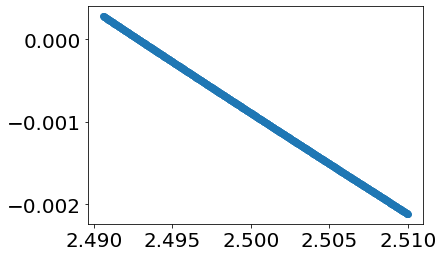

In [95]:
plt.plot(dx[30:],df[30:], '-o')

In [99]:
from ase.units import Bohr
1.42-2.5*Bohr

0.097056973590397